In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('boston.csv')

df.head()

,CRIM,CRIM.1,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**SOME INFO**: (from Kaggle)


**Context**
The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

Attribute Information
Input features in order:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied h**omes i**n $1000's [k$]

Source
StatLib - Car**negie Mellon Un**iversity

Relevant Papers
Harrison, David & Rubinfeld, Daniel. (1978). Hedonic housing prices and the demand for clean air. Journal of Environmental Economics and Management. 5. 81-102. 10.1016/0095-0696(78)90006-2. LINK

Belsley, David A. & Kuh, Edwin. & Welsch, Roy E. (1980). Regression diagnostics: identifying influential data and sources of collinearity. New York: Wiley LINK

In [85]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   CRIM.1   506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
             CRIM      CRIM.1       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

In [86]:

df['CHAS'] = df['CHAS'].astype('boolean')

print(df.dtypes)
print(df.isnull().sum())




CRIM       float64
CRIM.1     float64
INDUS      float64
CHAS       boolean
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
CRIM       0
CRIM.1     0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


1.**Exploratory Data Analysis**


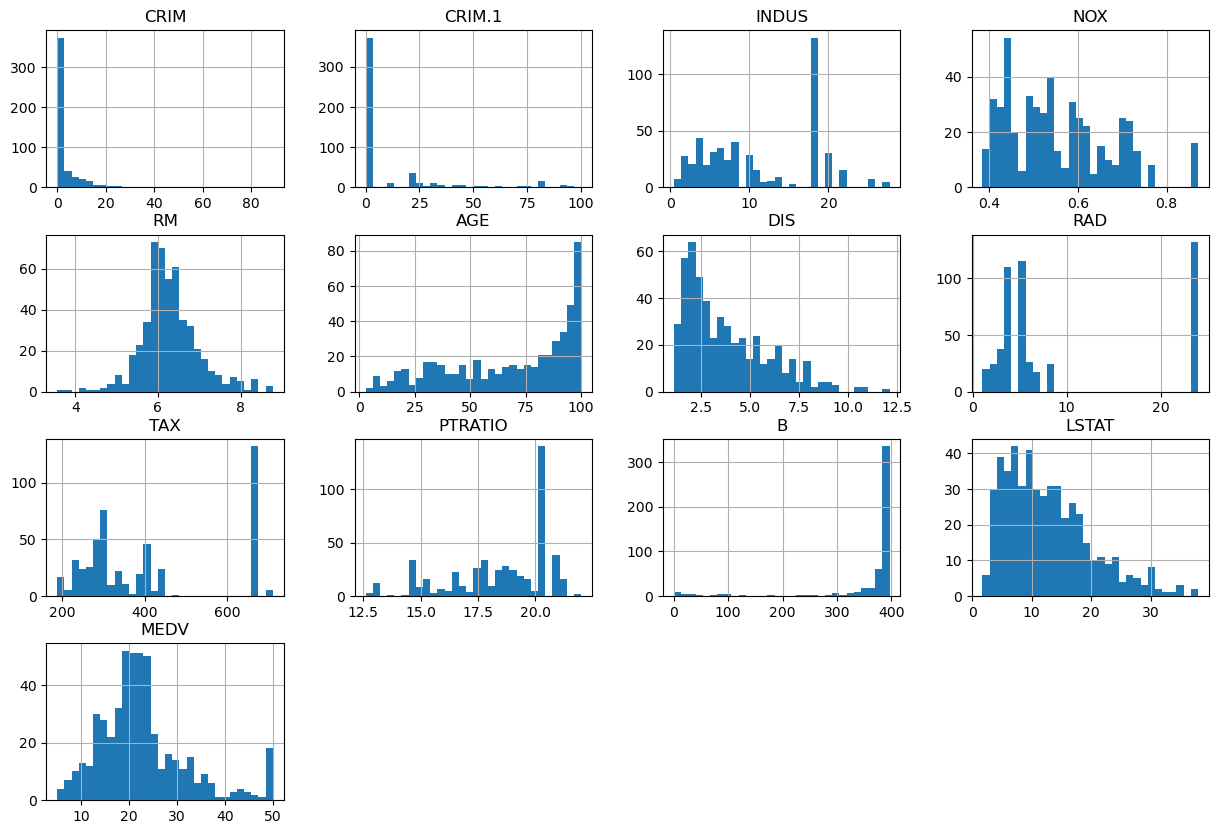

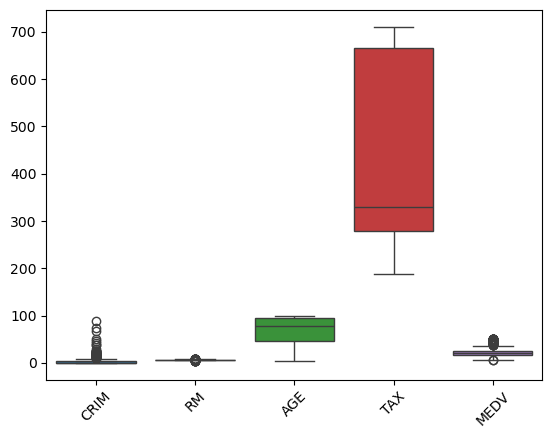

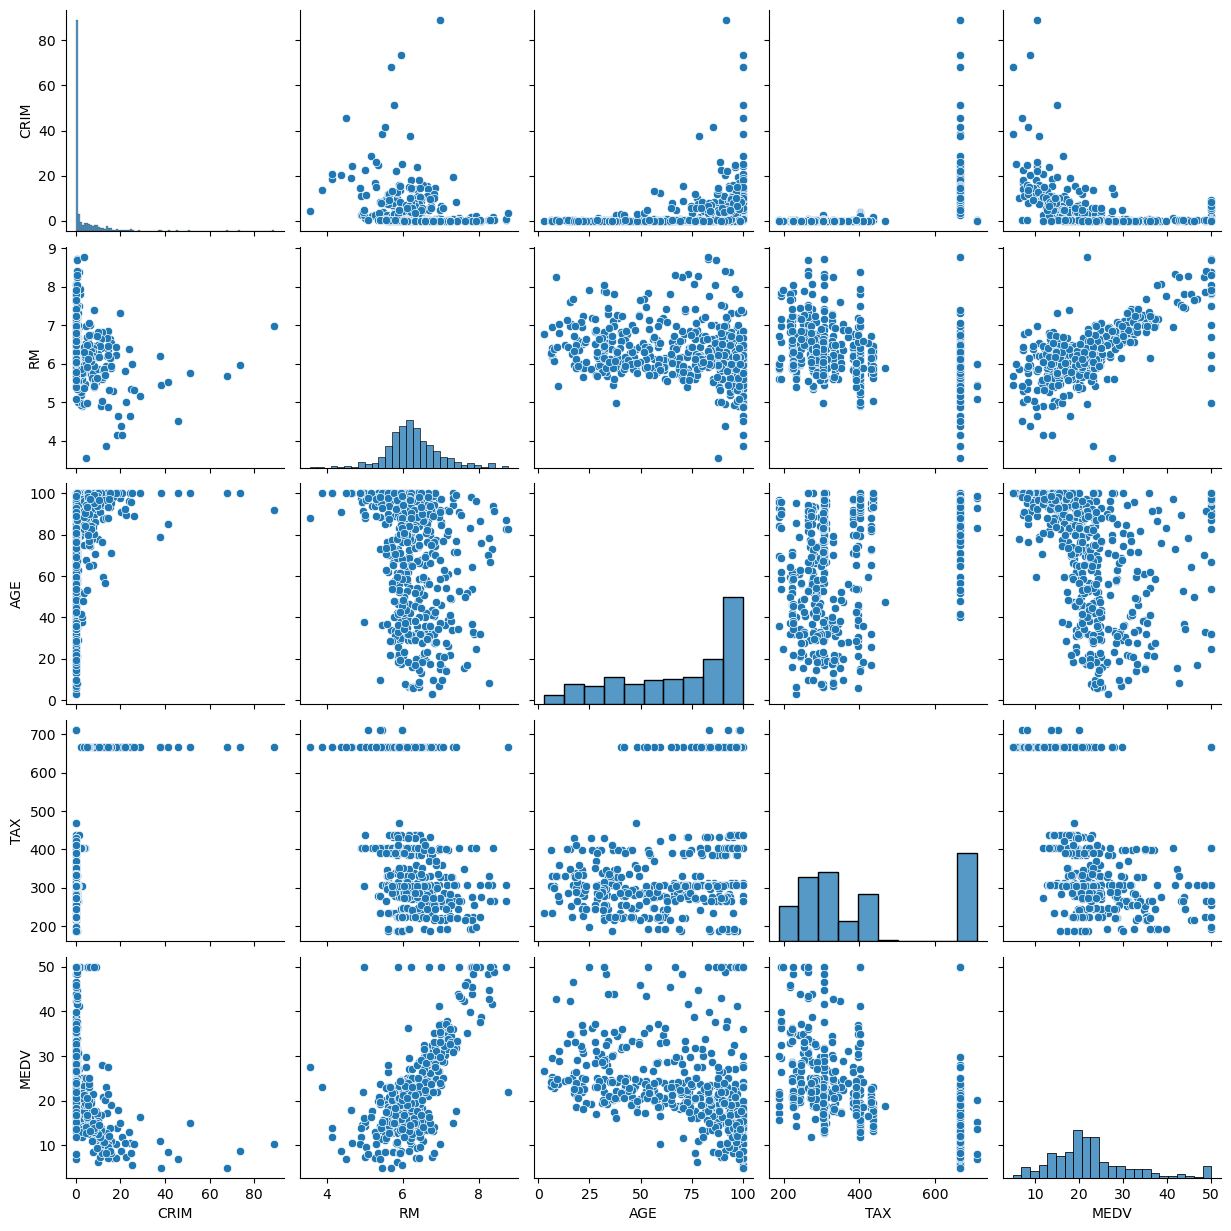

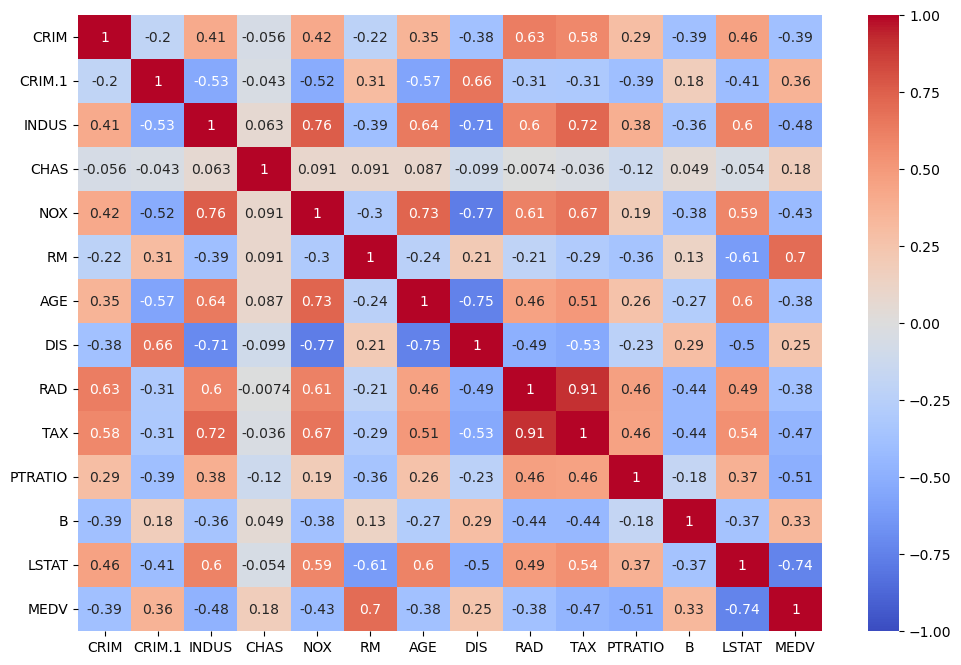

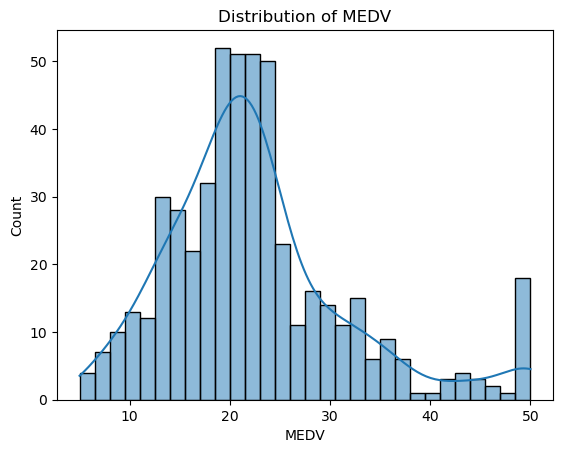

In [88]:
df.hist(bins=30, figsize=(15, 10))
plt.show()
#to spot outliers
sns.boxplot(data=df[['CRIM', 'RM', 'AGE', 'TAX', 'MEDV']])
plt.xticks(rotation=45)
plt.show()

sns.pairplot(df[['CRIM', 'RM', 'AGE', 'TAX', 'MEDV']])
plt.show()
#for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()
sns.histplot(df['MEDV'], bins=30, kde=True)
plt.title('Distribution of MEDV')
plt.show()


**Notes:**
  - CRIM & MEDV : from the scatter plot we notice a negative relationship between the two variables , indicating that as the crime rate increases , the median home value tends to decrease.
  - RM & MEDV : The scatter plot shows a positive relationship between RM and MEDV , suggesting that as the average number of rooms increases, the median home value also tends to increase.
  - TAX & MEDV : we notice a negative relationship between TAX and MEDV where higher property tax rates are associated with lower median home values.
  - LSTAT & MEDV : The scatter plot and histogram indicate a negative relationship between LSTAT and MEDV, where a higher percentage of the population with lower status is associated with lower median home values.

- Based on the correlation matrix,we will include the following features: RM , LSTAT , CRIM and Tax
TAX 

In [90]:
from sklearn.model_selection import train_test_split

# defining the  features and target variable
X = df[['RM', 'LSTAT', 'CRIM', 'TAX']]
y = df['MEDV']

#we preprocess the data by spliting into testing(20%) & training sets(80%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [106]:
import statsmodels.formula.api as smf
train_df = pd.concat([X_train, y_train], axis=1)
train_df.columns = list(X.columns) + ['MEDV']
model = smf.ols('MEDV ~ RM + LSTAT + CRIM + TAX', data=train_df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     198.3
Date:                Sun, 25 Aug 2024   Prob (F-statistic):           1.94e-93
Time:                        15:04:49   Log-Likelihood:                -1254.0
No. Observations:                 404   AIC:                             2518.
Df Residuals:                     399   BIC:                             2538.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.1498      3.503     -1.184      0.2

In [92]:
print(model.params)

Intercept   -4.149810
RM           5.633604
LSTAT       -0.520586
CRIM        -0.087727
TAX         -0.004537
dtype: float64


notice that : R-squared takes the value of 0.665 , which means that approximately 66.5% of the variance in MEDV is explained by the features we selected . 

The Mean Squared Error : 31.604547400302927
RMSE: 5.621792187577101


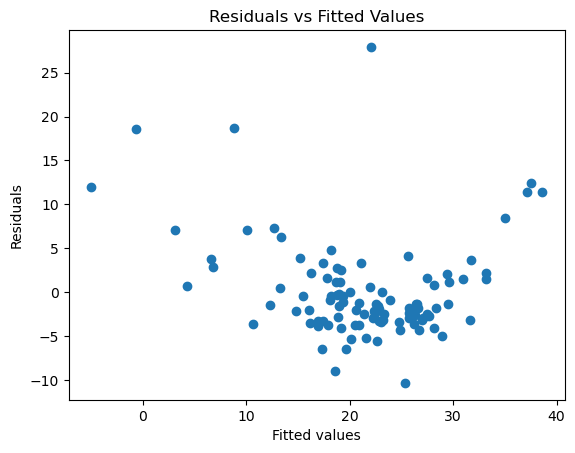

In [108]:
#we test the model using our previous test data

y_pred = model.predict(X_test)

#calculating the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"The Mean Squared Error : {mse}")

#calculating the Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print(f'RMSE: {rmse}')

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()



The MSE of 31.604547400302927 and the RMSE of 5.621792187577101 indicate that the model is making reasonably good predictions.

The linear regression model demonstrates a good fit with an R-squared value of **0.665**, indicating that about **66.5%** of the variance in the target variable (`MEDV`) is explained by the model.

The RMSE of **5.62** shows that, on average, the model's predictions deviate from the actual values by this amount.

Key features such as `RM`, `LSTAT`, `CRIM`, and `TAX` are statistically significant and contribute meaningfully to the model.

Residual analysis reveals that the residuals are randomly scattered without obvious patterns, suggesting that the model's assumptions are met. However, some outliers with large residuals are present.
